#NAME: RAVI YADAV


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from plotly.offline import plot, init_notebook_mode
#init_notebook_mode()
#import cufflinks as cf
#%matplotlib inline
#cf.set_config_file(offline=True)

df=pd.read_csv("/content/drive/MyDrive/stocks.csv")
df["Date"] = pd.to_datetime(df['Date'],format="%Y-%m-%d")

In [50]:
df.index=df['Date']

In [51]:
df=df.drop('Date',axis=1)

In [52]:
df.columns

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [53]:
df.head()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [54]:
df.shape

(2159, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2159 entries, 2012-01-12 to 2020-08-11
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 168.7 KB


Since all the features are float and only Date coulumn is converted to Datetime, also there is no missing values.

In [56]:
df.isnull().sum()

AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [57]:
df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


##Univariate Anylasis

In [58]:
df['AAPL'].mean()

140.81982259008825

In [59]:
df['AAPL'].median()

116.599998

##Checking For the outliers in the stock price

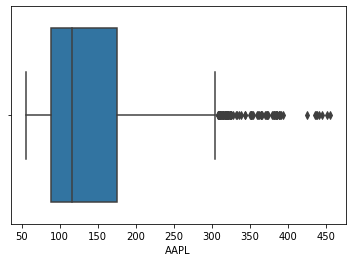

In [60]:
sns.boxplot(x=df.AAPL)

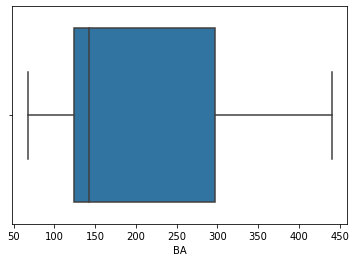

In [61]:
sns.boxplot(x=df.BA)

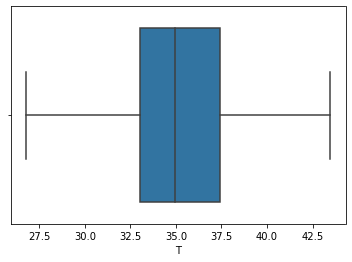

In [62]:
sns.boxplot(x=df['T'])

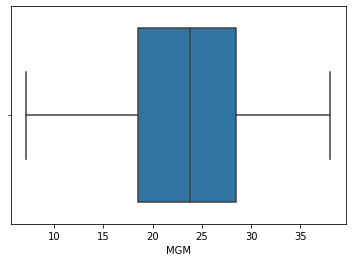

In [63]:
sns.boxplot(x=df.MGM)

###'MGM' has the lowest Stock Price comparing to all other companies with mean of 23.10.

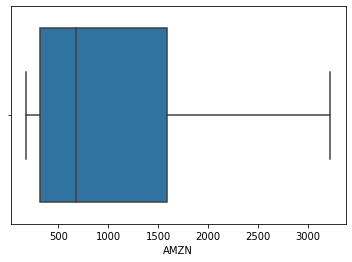

In [64]:
sns.boxplot(x=df.AMZN)

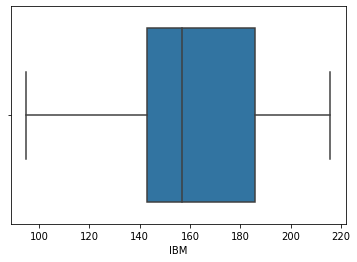

In [65]:
sns.boxplot(x=df.IBM)

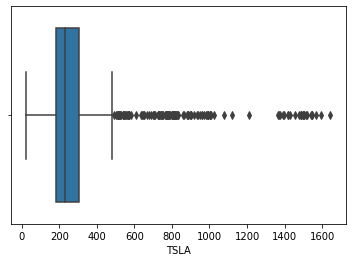

In [66]:
sns.boxplot(x=df.TSLA)

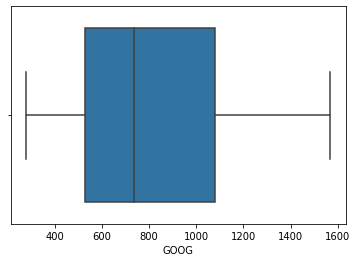

In [67]:
sns.boxplot(x=df.GOOG)

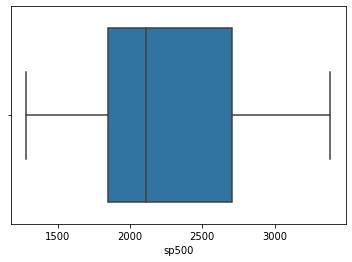

In [68]:
sns.boxplot(x=df.sp500)

###This company has the highest Stock price this may tell us the company is booming.

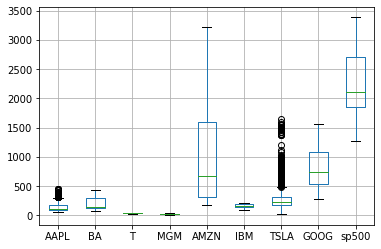

In [69]:
#Checking for The Outliers along with different features
df.boxplot()

###From the above plots we can infer that The company 'AAPL' and 'TSLA' have so much outliers this means that the stock prices for these companies are changing quit frequent where as if we talk about other companies the there is no outlier which means that the company is quit stable.


#Bivariate anylasis

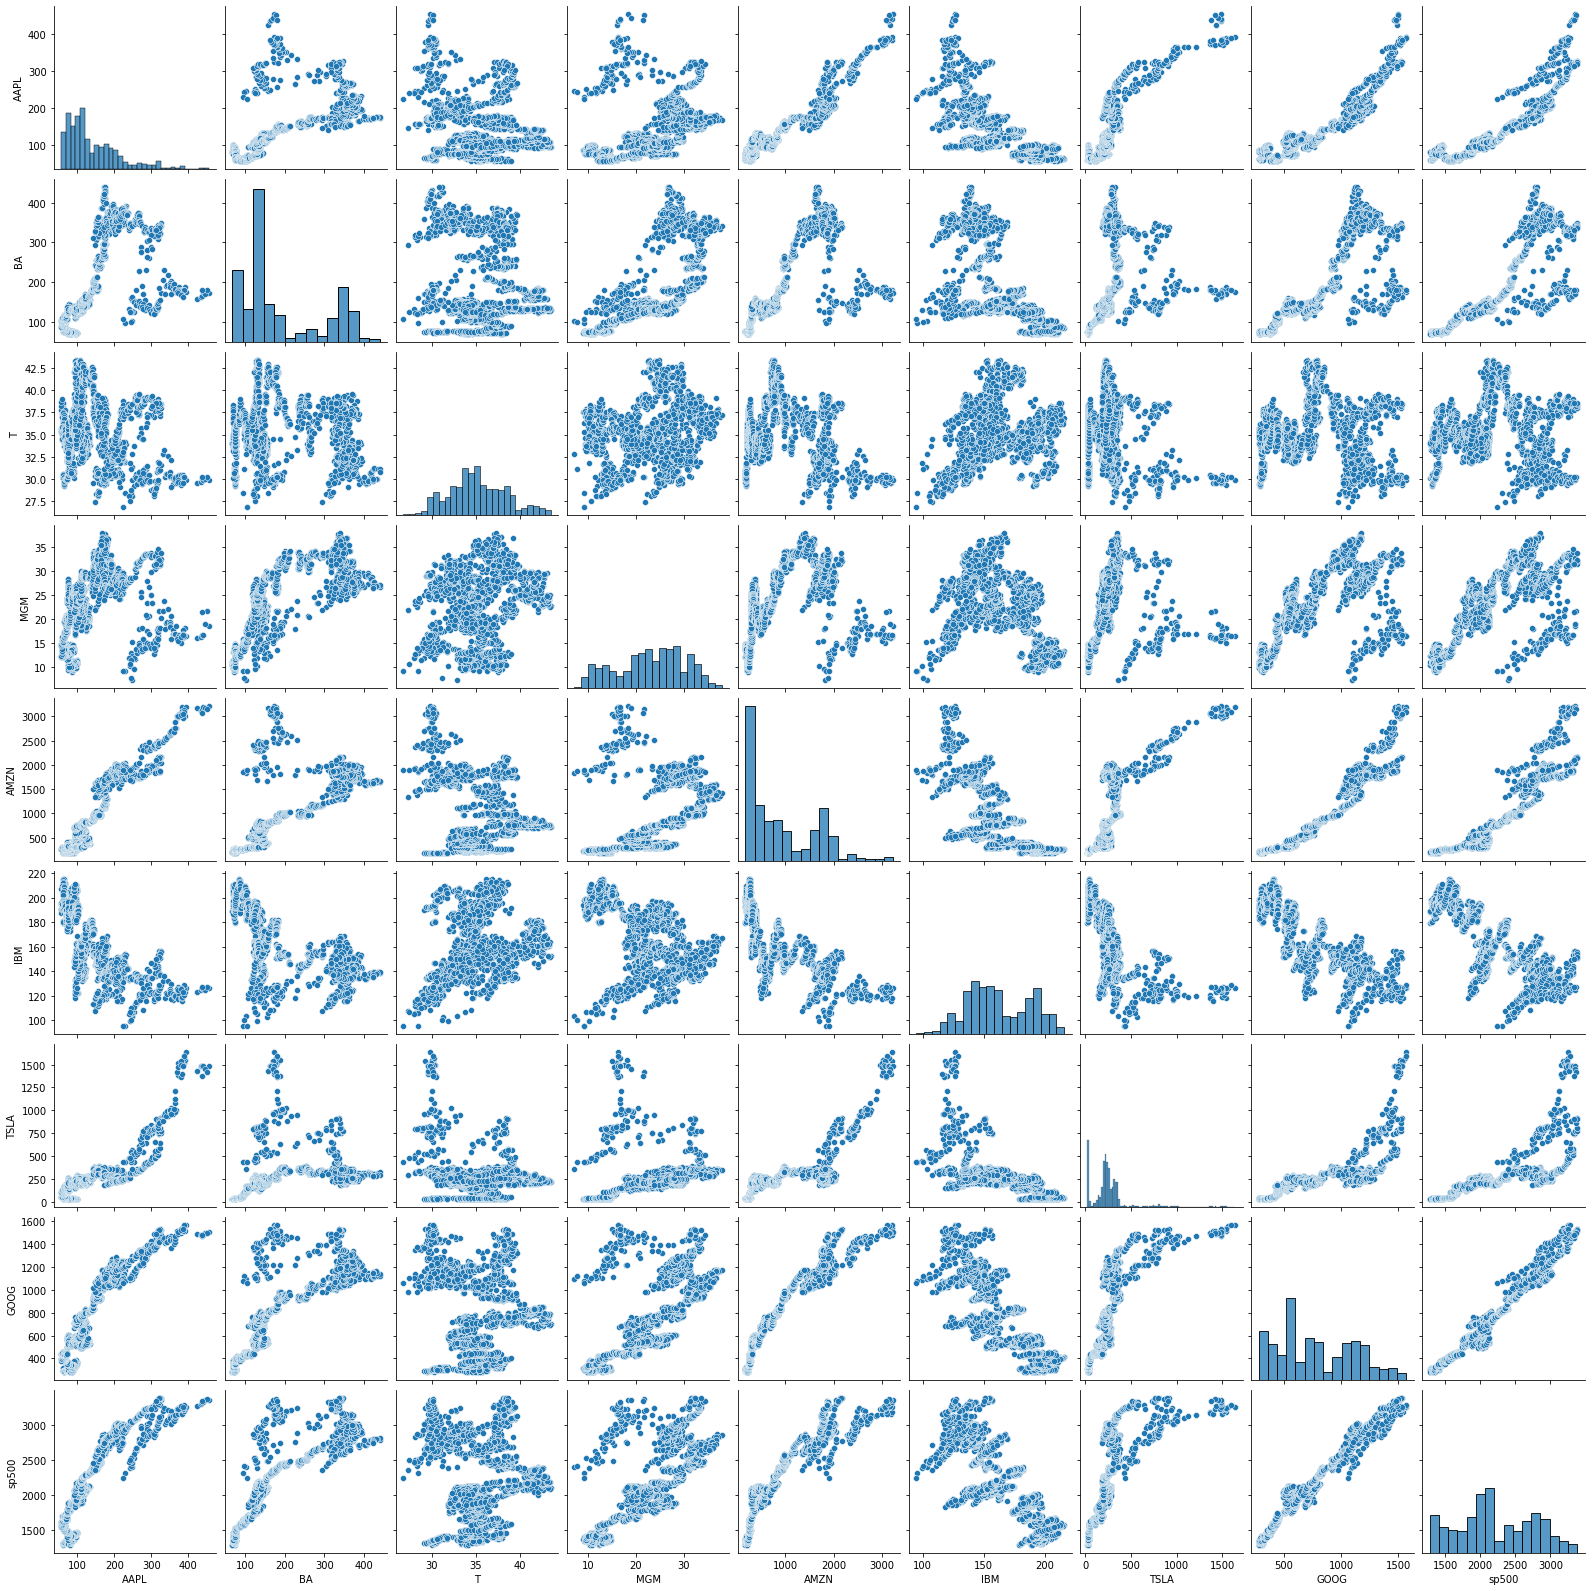

In [70]:
sns.pairplot(df)

###From the above pairplot we can easily see that companies such as 'T', 'IBM',  'MGM' are following a gaussian distribution whereas rest of the companies stock price is rightly skwed.

##Now lets see where there is any correlation between these stock price of different companies or they are independent from each other.

In [71]:
df_corr=df.corr()

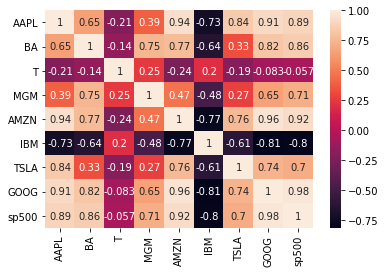

In [72]:
sns.heatmap(df_corr,annot=True)

so here we can see that 'GOOG' , 'TSLA' and 'sp500' are **highly positively corelated  morethan 80%** which gives us a sense that there might me any relation with their stock prices.


Also 'IBM' is **highly negatively Correlated morethan 80%** with the 'sp500' which means if we decrease one the it will result in increasing of other stock price.

We can see an intresting trend with 'IBM' company is negatively correlated with rest of the Companies which give us an insight that IBM has **lot of Competitors**.

#Anylasing the stocks of each company yearly

Text(0.5, 1.0, 'Company vs Stock_Price')

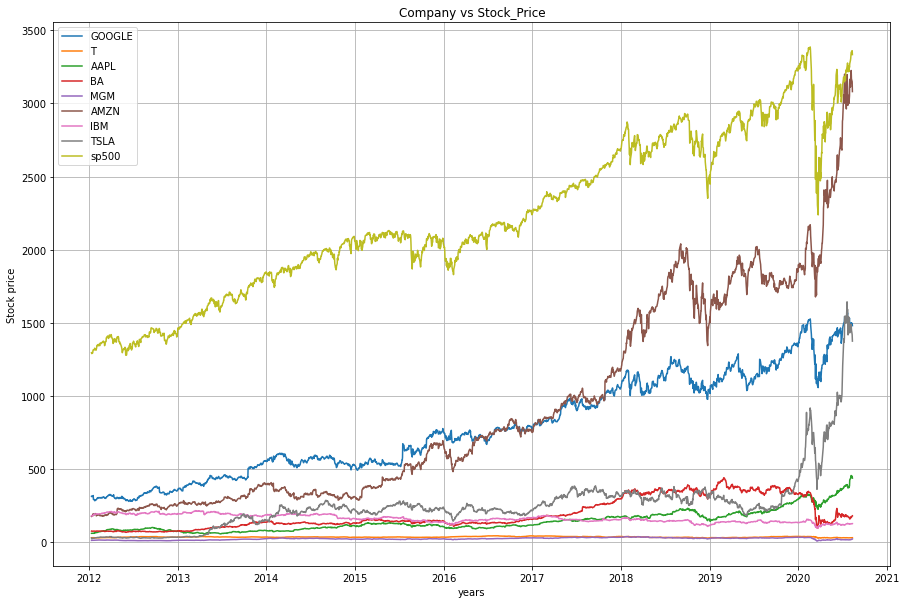

In [81]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['GOOG'],label='GOOGLE')
plt.plot(df['T'],label='T')
plt.plot(df['AAPL'],label='AAPL')
plt.plot(df['BA'],label='BA')
plt.plot(df['MGM'],label='MGM')
plt.plot(df['AMZN'],label='AMZN')
plt.plot(df['IBM'],label='IBM')
plt.plot(df['TSLA'],label='TSLA')
plt.plot(df['sp500'],label='sp500')
plt.ylabel("Stock price")
plt.xlabel('years')
plt.legend(loc=2)
plt.title("Company vs Stock_Price")

###So we can see that the 'AMZN' stock prices is increasing rapidly along with 'sp500' as the top.

#'IBM' Stock analysis for monthly , weekly as well as daily stock prices.

In [93]:
df['IBM_week'] = df.IBM.rolling(7).mean().shift()
df['IBM_month'] = df.IBM.rolling(30).mean()

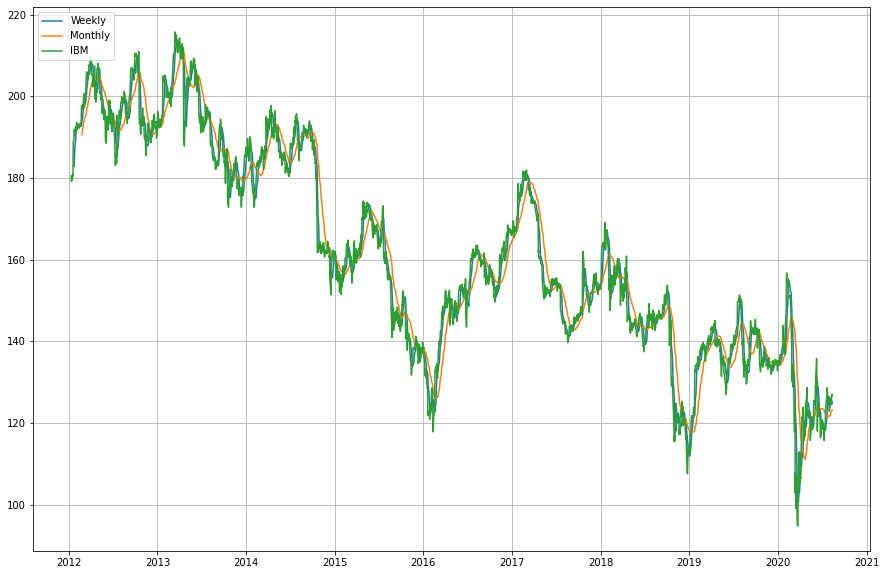

In [94]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['IBM_week'],label='Weekly')
plt.plot(df['IBM_month'], label='Monthly')
plt.plot(df['IBM'],label='IBM')
plt.legend(loc=2)

In [ ]:
['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

#Anylasis for 'GOOG'

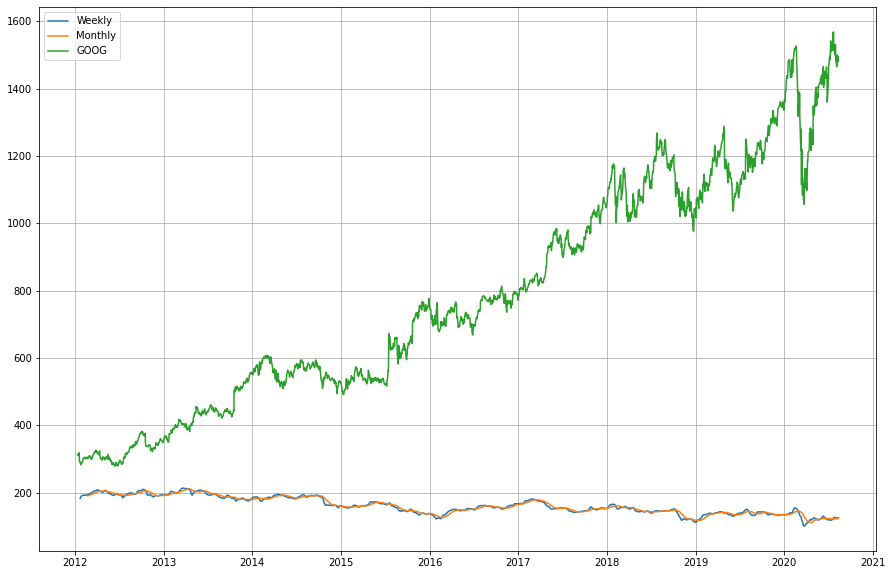

In [98]:
df['GOOG_week'] = df.IBM.rolling(7).mean()
df['GOOG_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['GOOG_week'],label='Weekly')
plt.plot(df['GOOG_month'], label='Monthly')
plt.plot(df['GOOG'],label='GOOG')
plt.legend(loc=2)

#ANLAYSIS FOR 'AAPL'

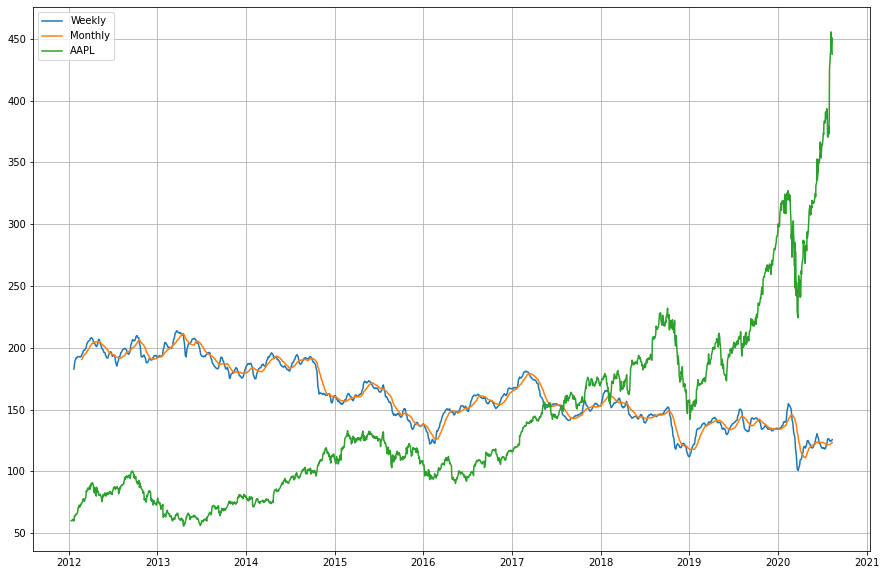

In [99]:
df['AAPL_week'] = df.IBM.rolling(7).mean()
df['AAPL_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['AAPL_week'],label='Weekly')
plt.plot(df['AAPL_month'], label='Monthly')
plt.plot(df['AAPL'],label='AAPL')
plt.legend(loc=2)

#ANLAYSIS FOR 'AMZN'

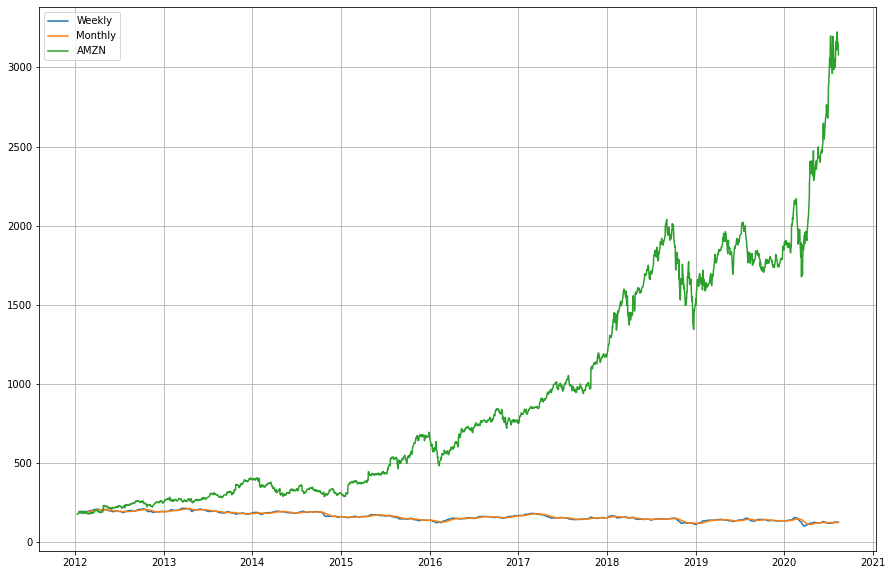

In [100]:
df['AMZN_week'] = df.IBM.rolling(7).mean()
df['AMZN_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['AMZN_week'],label='Weekly')
plt.plot(df['AMZN_month'], label='Monthly')
plt.plot(df['AMZN'],label='AMZN')
plt.legend(loc=2)

#ANALYSIS FOR sp500

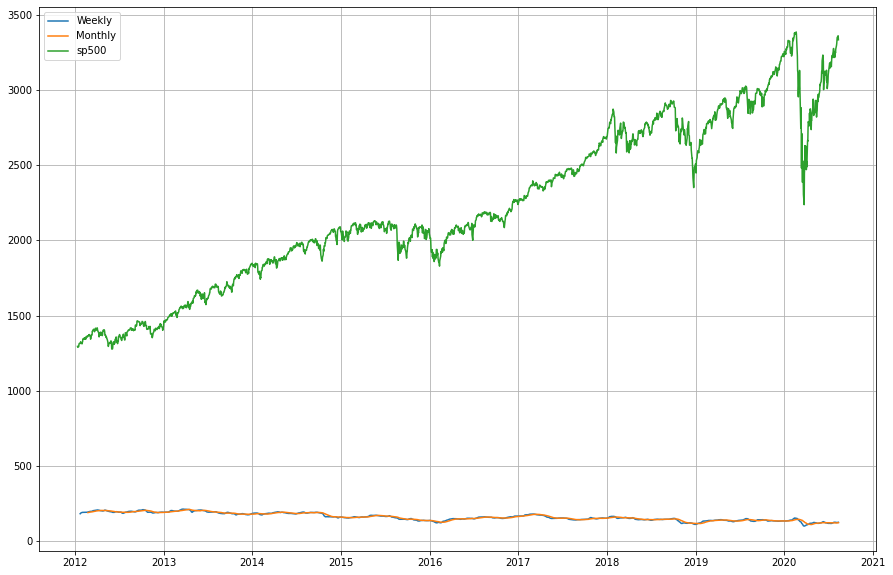

In [101]:
df['sp500_week'] = df.IBM.rolling(7).mean()
df['sp500_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['sp500_week'],label='Weekly')
plt.plot(df['sp500_month'], label='Monthly')
plt.plot(df['sp500'],label='sp500')
plt.legend(loc=2)

#Analysis for 'MGM'

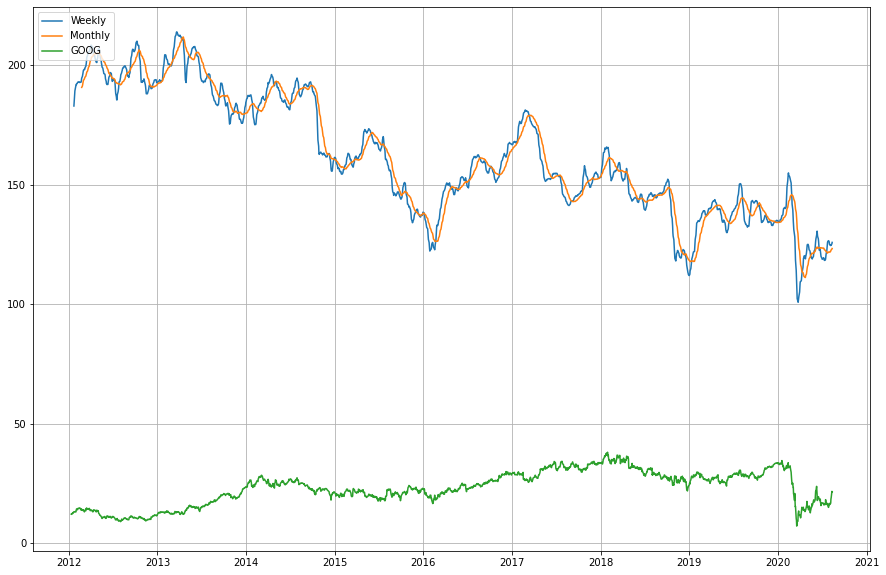

In [102]:
df['MGM_week'] = df.IBM.rolling(7).mean()
df['MGM_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['MGM_week'],label='Weekly')
plt.plot(df['MGM_month'], label='Monthly')
plt.plot(df['MGM'],label='GOOG')
plt.legend(loc=2)

#THANK YOU!